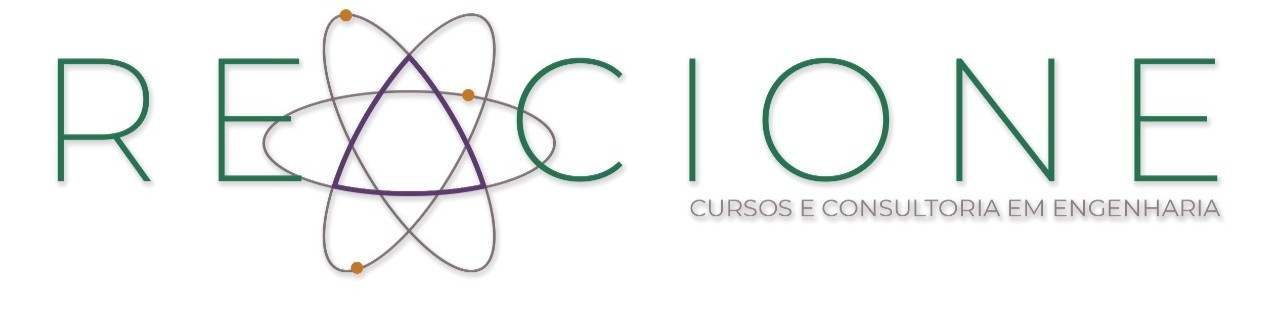

---

# **Análise de Inadimplência em uma Instituição Financeira**
 
(Analista de dados)

Mauro Wysard

---

# **Entendendo o negócio**

Instituições financeiras que concedem crédito precisam de constante controle da razão entre clientes adimplentes e inadimplentes, ou seja, existe um esforço para que a quantidade de clientes adimplentes seja suficiente para cobrir o déficit gerado pelos inadimplentes e mesmo assim gerar lucro. 

Para atingir este objetivo, além da captação de novos clientes, é necessário estimular a adimplência do quadro de clientes existente e controlar os clientes que tendem a entrar em inadimplência. Este controle pode ser feito de diversas formas, reduzindo a quantidade de crédito cedido, quantidade de aquisições em um período determinado ou até mesmo, em casos mais graves, bloqueando a carteira de crédito do cliente. Sendo assim, é extremamente necessário ter um profundo conhecimento da base de dados e comportamento dos indivíduos enquanto clientes, para que a tomada de decisão por parte da instituição seja a mais assertiva possível.  

Metodologias de análise causativa preditiva são uma importante ferramenta para traçar tendencias de comportamento dentro de uma base de dados. O que possibilita criar modelos analíticos guiados pelo histórico de pagamento e antecipar a probabilidade de um cliente entrar em débito com a credora.  

Com esta finalidade, uma instituição financeira encomendou um estudo para quantificar clientes inadimplentes dentro de seu banco de cadastros e traçar similaridades entre perfis de clientes que os levem a tornarem-se inadimplentes. O objetivo específico é filtrar a carteira de clientes e tornar o programa de quitação de dívidas mais eficiente, evitar que um cliente venha a se tornar inadimplente ou recomendar melhores condições de quitação da dívida. Ao mesmo tempo, as análises e dados utilizados serão implementados em algoritmos de preditivos através do aprendizado de máquina. 

Foram fornecidas 15 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela.

# **Dicionário de dados**

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| id| M = número de identificação do cliente |categórico|
|**default**| identificador de inadimplência (sim = 1, não = 0) |categíco (binário)|
| idade| idade em anos |inteiro|
| sexo| M- masculino, F = Feminino |inteiro|
| dependentes| número de dependentes financeiros | inteiro |
| escolaridade| Nível de educação (ex: primário a Pós-graduação) |categórico|
| estado_civil | Estado civil (ex: solteiro, casado etc)| categórico |
| salario_anual | renda por ano | categórico |
| tipo_cartao | cartão quanto ao crédito praticado (blue, silver e gold) |categórico|
| meses_de_relacionamento | tempo desde abertura de conta em meses |inteiro|
| qtd_produtos | produtos adquiridos porano |inteiro|
| iteracoes_12m | interações com a instituição por ano |inteiro|
| meses_inativo_12m | meses sem realizar operações por ano |inteiro|
| limite_credito | crédito concedido |inteiro|
| valor_transacoes_12m | crédito praticado por ano |inteiro|
| qtd_transacoes_12m | número de transações por ano |inteiro|

# **1 - Bibliotecas a serem usadas** *(pandas, seaborn e matplotlib)*

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

sns.set_style("dark")

# **2 - Análise exploratória e limpeza de dados**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

Agora com o Dataframe definido, vamos usar a função head do pandas para vizualizar as informações presentes na tabela.

In [3]:
df.head(n=20)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


A coluna default contém a informação de clientes adimplentes (default=0) e inadimplentes (default=1). Assim, esta será a variável dependente, a qual iremos correlacionar com os dados presentes nas demais colunas.
Com a função shape presente no pacote pamdas podemos começar a verificar algumas métricas da variável de interesse. Assim, iremos verificar o total de linhas com a informação default e a proporção entre clientes adimplentes e inadimplentes, default 0 e 1, respectivamente.


In [4]:
df.shape

(10127, 16)

In [5]:
df[df['default'] == 0].shape

(8500, 16)

In [6]:
df[df['default'] == 1].shape

(1627, 16)

In [7]:
qtd_total, _ = df.shape
print(qtd_total)
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape
print(qtd_inadimplentes)

print(f'A quantidade de clientes adimplentes representa {round((qtd_adimplentes/qtd_total)*100, 2)}% do total.')
print(f'A quantidade de clientes inadimplentes representa {round((qtd_inadimplentes/qtd_total)*100, 2)}% do total.')

10127
1627
A quantidade de clientes adimplentes representa 83.93% do total.
A quantidade de clientes inadimplentes representa 16.07% do total.


Percebemos que oo subgrupo amostral que representa os clientes inadimplentes é muito menor do que os adimplentes, isso é uma boa notícia, pois indica que as operações da prestadora de crédito estão sadias. Por outro lado, para nossa análise, significa que teremos pouca representatividade para a futuras avaliações.

Agora iremos analisar o schema dos dados que temos. Nesta etapa é importante verificar possíveis dados faltantes em cada linha e/ou coluna, também iremos avaliar se os dados são reconhecidos pelo python de acordo com sua representatividade no código, em outras palavras, se dados numéricos são reconhecidos como inteiros ou float, por exemplo. 

In [8]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Observando o tipo dos dados na célula acima, percebemos que alguns dados não estão coerentes com o que esperamos para a coluna que representam, como no caso do 'limite_credito' e 'valor_transacoes_12m'. Futuramente será interessante utilizar estes dados em nossas análises numéricas, e neste caso, estão representados por strings(object, no caso do pandas). Isto acontece geralmente porque o python reconhece virgulas como strings, então devemos remover estas virgulas e substituir por pontos para convertê-los em floats.

Para a operação de substituição a aplicação de uma função lambda será suficiente.

In [9]:
fn_subst = lambda valor: float(valor.replace('.', '').replace(',', '.'))

In [10]:
df['limite_credito'] = df['limite_credito'].apply(fn_subst)
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn_subst)
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Agora as colunas 'limite_credito' e 'valor_transacoes_12m' representam dados numéricos. Com os dados convertidos, partimos para a verificação de dados faltantes.

In [11]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

O conjunto de funções .isna().any() retornou o valor True em três colunas (escolaridade, estado_civil e salario_anual), com isto, podemos ter certeza que nestas colunas existem dados faltantes. É necessário remover estes dados para que não ocorra maiores problemas ao longo do código. Mas será que a remoção destes dados terão impacto significativo no pequeno grupo amostral que temos?

Para verifcar este impacto iremos criar uma função para avaliar a proporção de dados faltantes em termos da variável default.

In [12]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ =df.shape
      dict_dados_faltantes = {col:{'quantidade': qtd, 'porcentagens': round((qtd/total)*100,2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)
      


In [13]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagens': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagens': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagens': 10.98}}


In [14]:
stats_dados_faltantes(df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagens': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagens': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagens': 10.88}}


In [15]:
stats_dados_faltantes(df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagens': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagens': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagens': 11.49}}


A quantidade de dados faltantes entre os clientes adimplentes (variando de 10 a 14%) e inadinplentes (variando de 11 a 15%) são muito próximos, então, podemos eliminar esses dados com segurança, pois a alteração na quantidade de dados vai ser proporcional para os dois casos.


In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(7081, 16)

In [18]:
df[df['default'] == 0].shape

(5968, 16)

In [19]:
df[df['default'] == 1].shape

(1113, 16)

In [20]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

print(f'A proporção de clientes adimplentes ativos é de {round((qtd_adimplentes/qtd_total)*100, 2)}%')
print(f'A proporção de clientes adimplentes após a remoção de dados faltantes é de {round((qtd_adimplentes_novo/qtd_total_novo)*100, 2)}%')
print('')
print(f'A proporção de clientes inadimplentes ativos é de {round((qtd_inadimplentes/qtd_total)*100, 2)}%')
print(f'A proporção de clientes inadimplentes ativos é de {round((qtd_inadimplentes_novo/qtd_total_novo)*100, 2)}%')

A proporção de clientes adimplentes ativos é de 83.93%
A proporção de clientes adimplentes após a remoção de dados faltantes é de 84.28%

A proporção de clientes inadimplentes ativos é de 16.07%
A proporção de clientes inadimplentes ativos é de 15.72%


##**3 - VISUALIZAÇÃO DOS DADOS**

### 3.1 - Dados Categóricos

Primeiro vamos analisar o comportamento da variável default em relação as demais variaveis categóricas (não numéricas), para isto, usamos os gráficos de barras. Respeitando a lei geral de proteção de dados (LGPD), serão correlacionadas somente as colunas, escolaridade, estado_civil, salario_anual e tipo_cartão.

Aplicando uma única função para a geração dos gráficos com a mesma unidade de código. 

In [21]:
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

def barras_cotegorico(coluna: str):

  titulos = ['(a) ' + coluna + ' dos clientes totais', '(b) ' + coluna + ' dos clientes adimplentes', '(c) ' + coluna + ' dos clientes inadimplentes']
  eixo = 0
  max_y = 0
  max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

  figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

  for dataframe in [df, df_adimplente, df_inadimplente]:

    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(columns={coluna:'frequencia_absoluta'}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.sort_values(by=[coluna], inplace=True)
    df_to_plot.sort_values(by=[coluna])

    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequencia Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=45)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo +=1

  return figura.show()

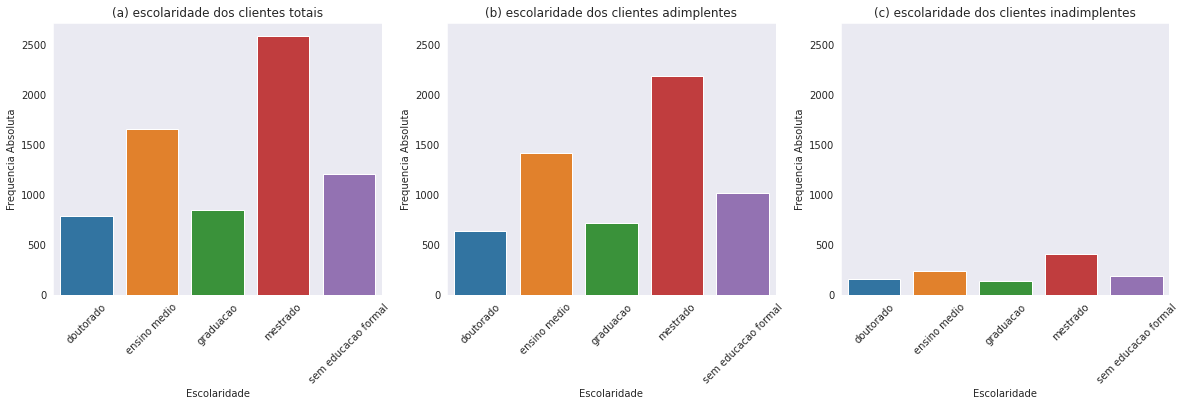

In [22]:
barras_cotegorico(coluna='escolaridade')

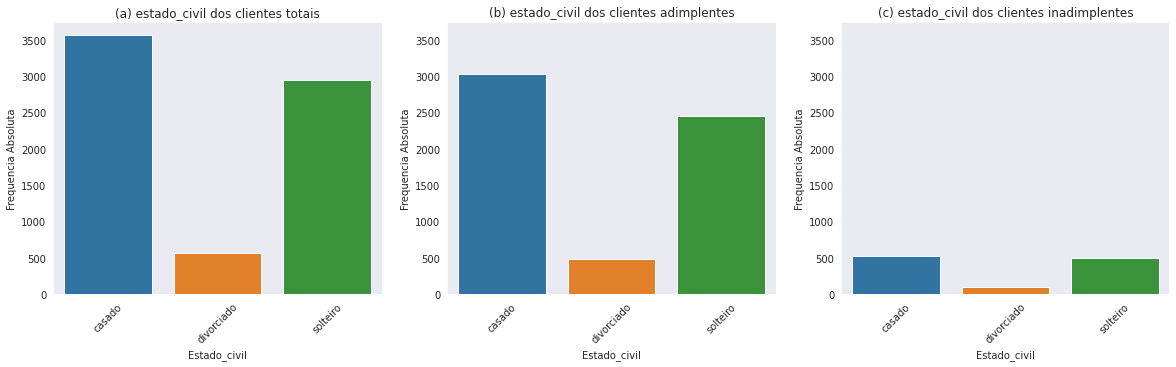

In [23]:
barras_cotegorico(coluna='estado_civil')

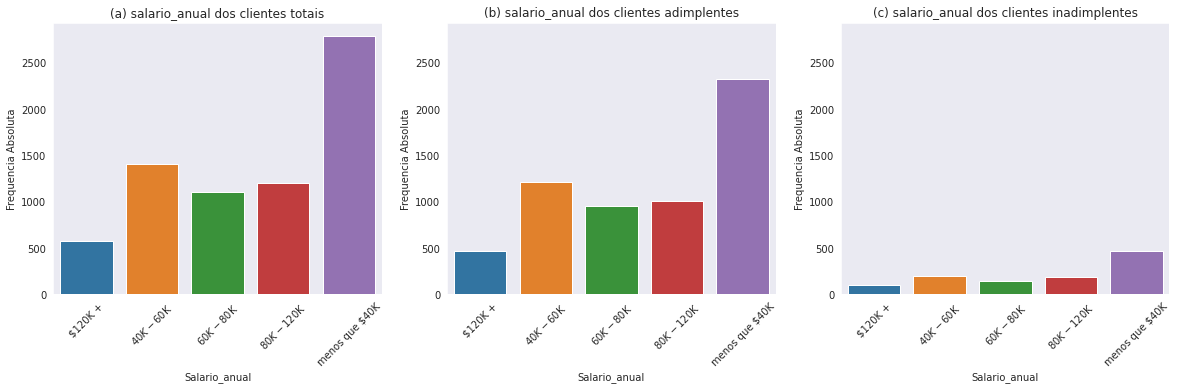

In [24]:
barras_cotegorico(coluna='salario_anual')

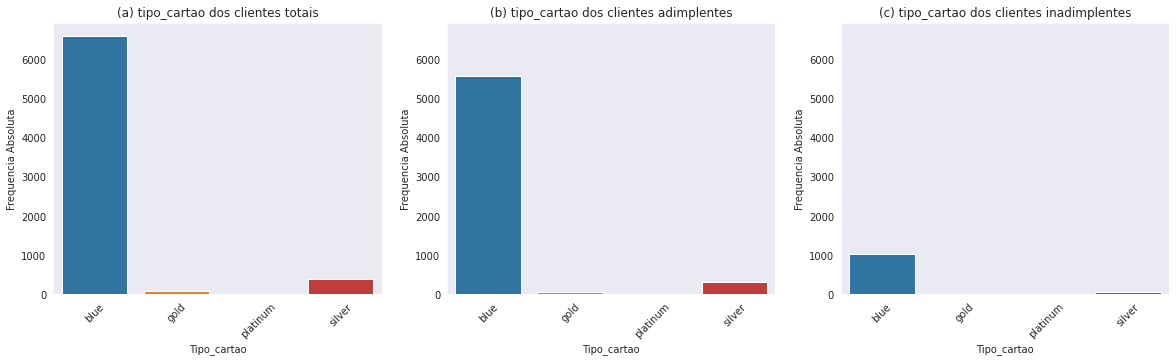

In [25]:
barras_cotegorico(coluna='tipo_cartao')

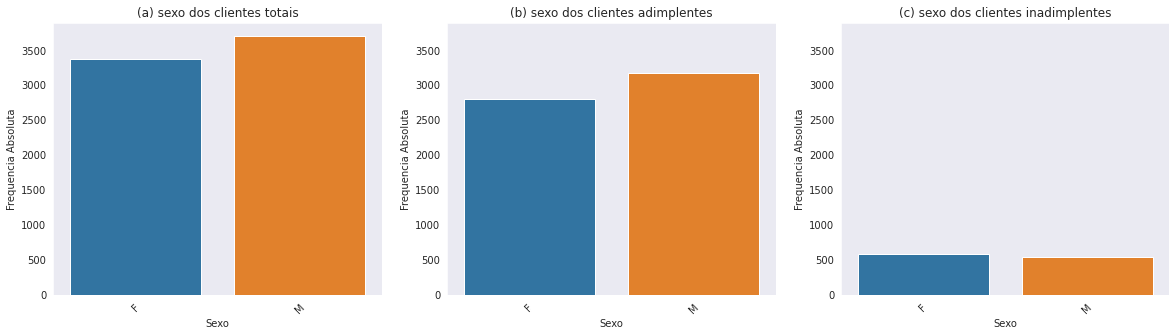

In [26]:
barras_cotegorico(coluna='sexo')

Da esquerda para a diretita temos representado pelas barras o número total de cliesntes, somente dos adimplentes e somente inadimplentes (respectivamente), em função dos dados categóricos. Aqui percebemos que nehuma caracteristica desses clientes tem impacto na variável dependente (default), pois o perfil das barras é o mesmo em todos os gráficos. Desta forma podemos dizer que não há uma causa potencial para o peroblema dentro deste subgrupo de dados.

### 3.2 - Dados numéricos (contínuos)

Agora vamos analisar as variáveis numéricas atraves de histogramas, adotando a mesma estratégia anterior, ou seja, colocar lado a lado os histogramas do quadro geral de clientes, dos cliente adimplêntes e dis inadimplentes.

In [27]:
df.drop(['id','default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


In [28]:
def histograma_numerico(coluna: str):

  titulos = ['(a) ' + coluna + ' geral', '(b) ' + coluna + ' no subgrupo adimplentes', '(c) ' + coluna + ' no subgrupo inadimplentes']

  eixo = 0
  max_y = 0

  figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

  for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequencia Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

  return figura.show()

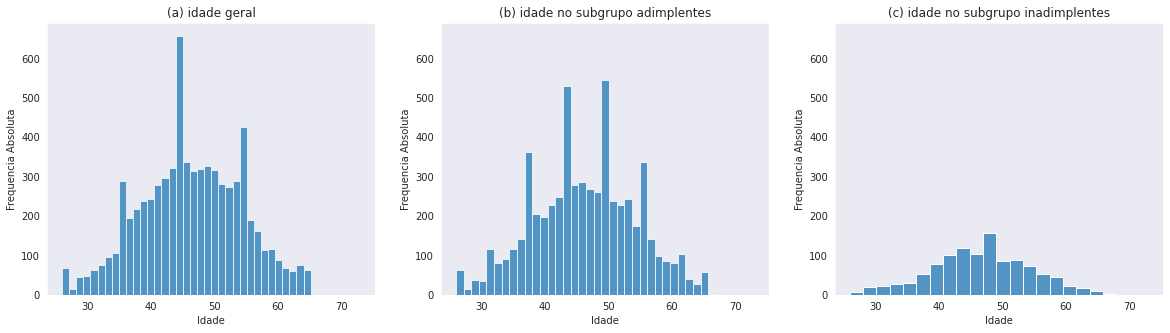

In [29]:
histograma_numerico(coluna='idade')

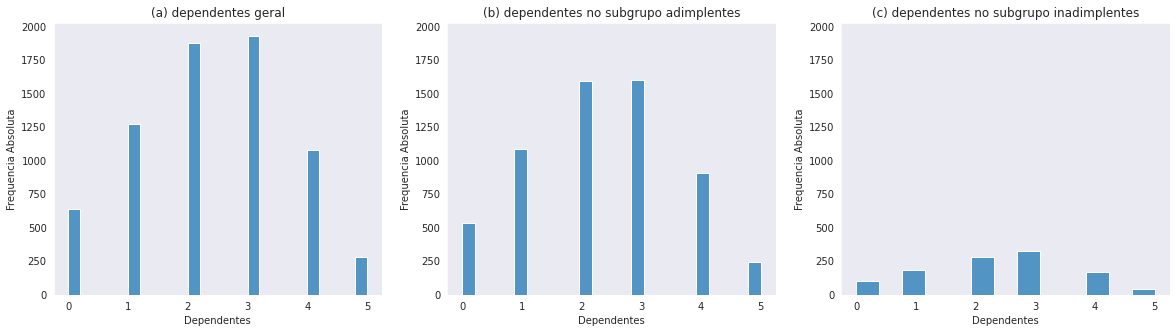

In [30]:
histograma_numerico(coluna='dependentes')

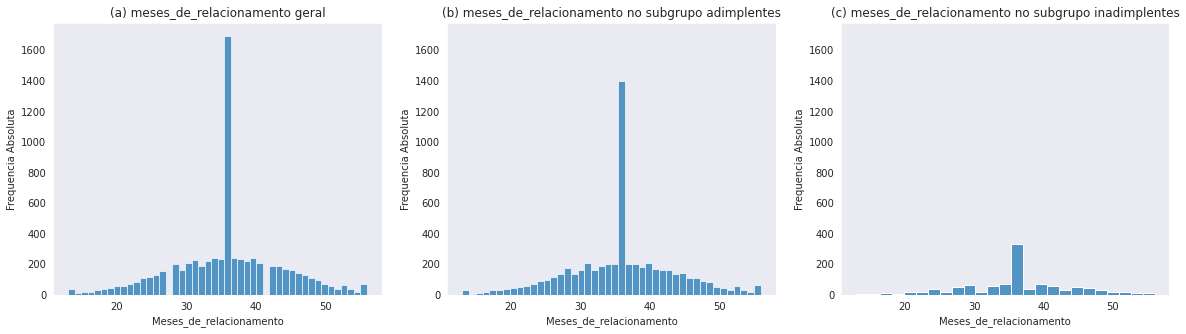

In [31]:
histograma_numerico(coluna='meses_de_relacionamento')

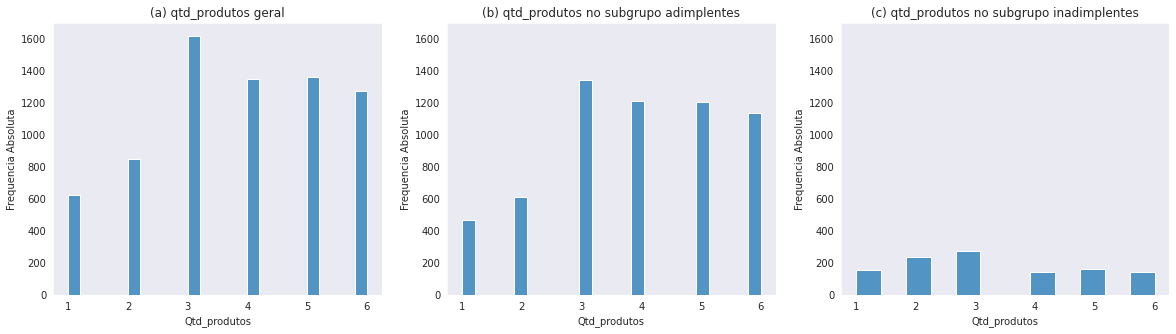

In [32]:
histograma_numerico(coluna='qtd_produtos')

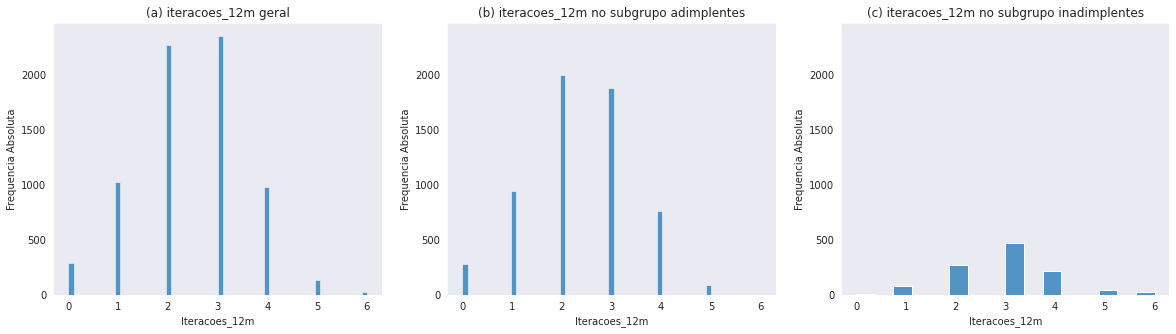

In [33]:
histograma_numerico(coluna='iteracoes_12m')

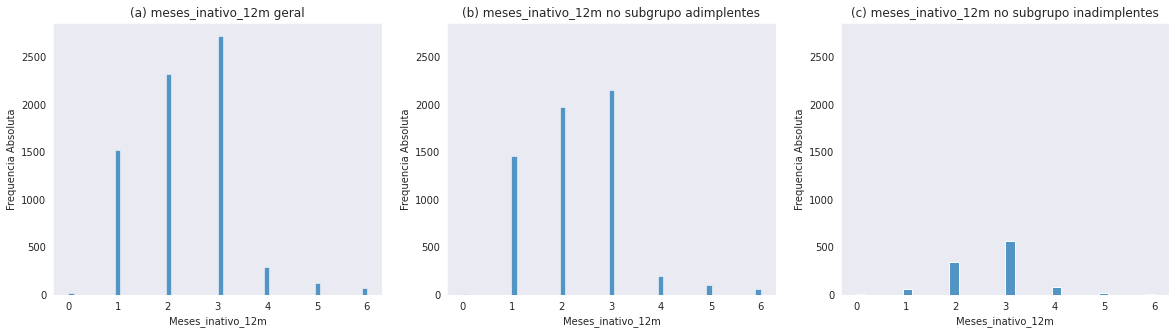

In [34]:
histograma_numerico(coluna='meses_inativo_12m')

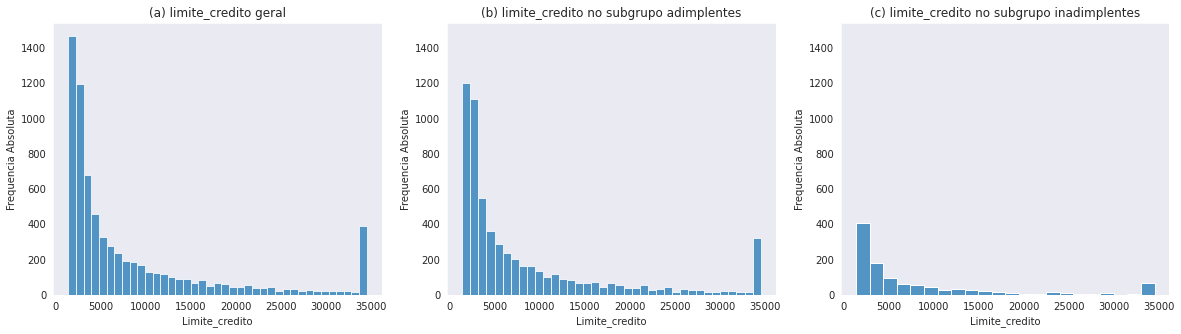

In [35]:
histograma_numerico(coluna='limite_credito')

Assim como as variáveis categóricas, até aqui, os histogramas não mostraram comportamentos distintos entre os clientes adimplentes e inadimplentes. Desta forma não consideraremos nenhum destes atributos como candidato significativo para apontar uma tendência de inadimplência.

Continuando com os histogramas das variáveis 'valor_transacoes_12m' e 'qtd_transacoes_12m':

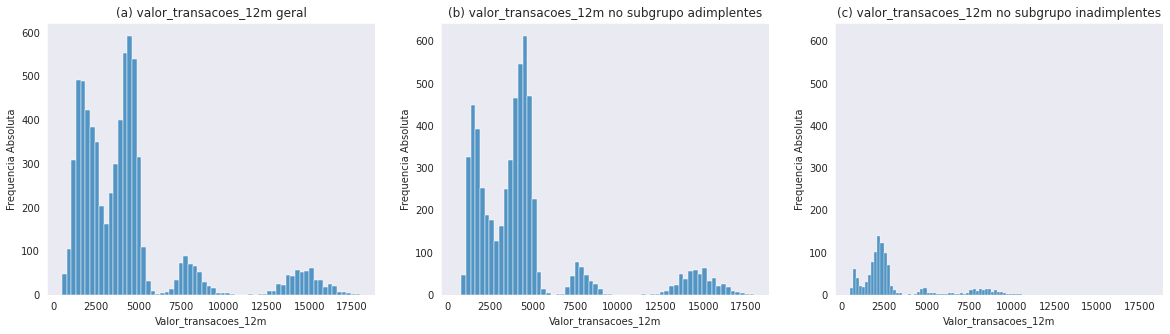

In [36]:
histograma_numerico(coluna='valor_transacoes_12m')

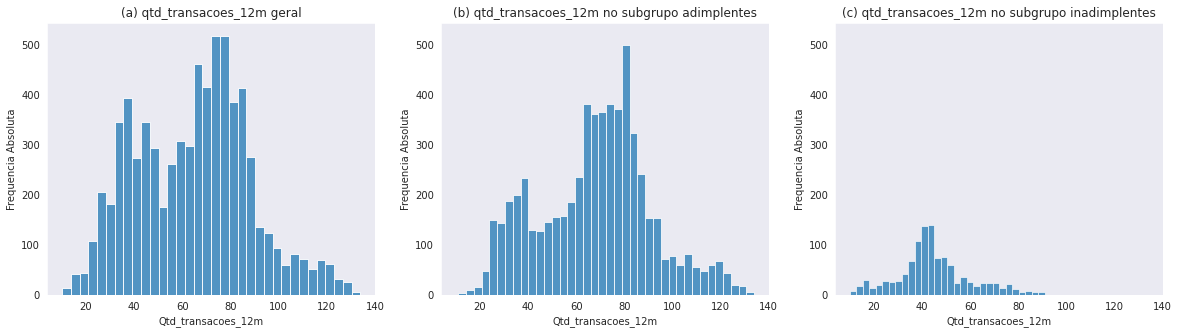

In [37]:
histograma_numerico(coluna='qtd_transacoes_12m')

Para estas duas variáveis numéricas, percebemos comportamentos contrários em certas regiões dos histogramas entre os clientes adimplentes e inadimplentes. Quanto ao valor das transações, uma menor frequência 

In [38]:
def distribuicao(colunax: str, colunay: str):
  f = sns.relplot(x=colunax, y=colunay, data=df, hue='default')
  _ = f.set(
      title= colunax + ' VS ' + colunay,
      xlabel=colunax,
      ylabel=colunay
  )
  return f

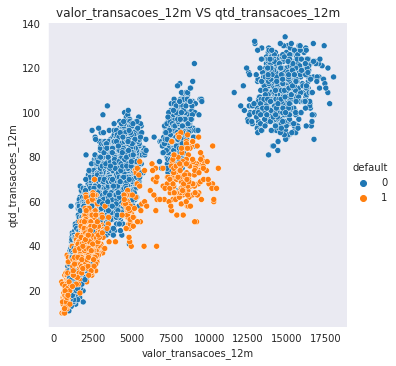

In [39]:
distribuicao(colunax='valor_transacoes_12m', colunay='qtd_transacoes_12m')

O gráfico de dispersão permite visualizar uma grande concentração da variável default em duas regiões, no eixo x há um volume desta variável em valores de transações de até aproximadamente 4500 mil reais e na faixa que vai de 5 mil a 10 mil reais. Também percebemos que a primeira região é representada no eixo y desde o mínimo de transações até aproximadamente 60 transações. Já a região dos clientes que praticam os maiores valores de transações está confinada entre 40 e 90 transações por ano. Assim, podemos dividir os clientes inadimplentes em dois grupos. O primeiro é formado por pessoas da primeira região, neste grupo é observado que a inadimplência ocorre a partir da mínima quantidade de transações. O segundo grupo são dos inadimplentes da segunda região, note que este grupo se torna inadimplente somente a partir de 40 transações o que mostra dois grupos com características bem distintas.

A distinção dos dois grupos indica que um planejamento de ações especificas para cada um seja mais eficiente. Sendo assim, é interessante extrair mais algumas métricas destes grupos para entregar a equipe de planejamento estratégico financeiro. Vamos verificar a distribuição destes grupos frente ao total de clientes inadimplentes e o peso que cada grupo tem sobre a o defict gerado.


In [40]:
df_grupo1 = df.loc[df['valor_transacoes_12m']<4500]
df_grupo2 = df.loc[df['valor_transacoes_12m']>5000]
df_grupo1_default = df_grupo1.loc[df_grupo1['default']==1]
df_grupo2_default = df_grupo2.loc[df_grupo2['default']==1]

qtd_grupo1, _= df_grupo1_default.shape
qtd_grupo2, _= df_grupo2_default.shape

print(f'A proporção de clientes inadimplentes ativos do grupo 1 é de {round((qtd_grupo1/qtd_total_novo)*100, 2)}%')
print(f'A proporção de clientes inadimplentes ativos do grupo 2 é de {round((qtd_grupo2/qtd_total_novo)*100, 2)}%\n')

divida_grupo1 = df_grupo1_default['valor_transacoes_12m'].sum()
divida_grupo2 = df_grupo2_default['valor_transacoes_12m'].sum()

print(f'O somatório do saldo devedor do grupo 1 representa {round((divida_grupo1/(divida_grupo1 + divida_grupo2))*100, 2)}% do total entre os clientes default')
print(f'O somatório do saldo devedor do grupo 2 representa {round((divida_grupo2/(divida_grupo1 + divida_grupo2))*100, 2)}% do total entre os clientes default')



                                      

A proporção de clientes inadimplentes ativos do grupo 1 é de 12.61%
A proporção de clientes inadimplentes ativos do grupo 2 é de 2.57%

O somatório do saldo devedor do grupo 1 representa 55.46% do total entre os clientes default
O somatório do saldo devedor do grupo 2 representa 44.54% do total entre os clientes default


A quantidade de clientes que fazem parte do grupo 2 é 5 vezes menor do que a quantidade de clientes do grupo 1, porém percebemos que o total de gastos do grupo 2 representa quase 50 % de todos os gastos entre os clientes inadimplentes. Isso significa que pequenas variações no grupo 2 são bem mais sensíveis, em termos de valor em débito.

### 4 - Considerações finais.

Com tudo, as seguintes recomendações seriam pertinentes: 

* Focar as estratégias de concessão e manutenção de crédito para clientes com características que se enquadrem nos grupos 1 e 2. 

* Estar atento ao valor praticado e o número de transações destes clientes. 

* Adotar políticas especificas para cada grupo de cliente, tendo em vista que o impacto de cada um é distinto. 

* O monitoramento deve ser executado continuamente dentro do grupo 1 já que a inadimplência vai desde a menor quantidade de transações efetuadas  

* Para o grupo 2, as medidas preventivas devem ser adotadas assim que os clientes se aproximarem do número crítico de operações (40 ao ano), buscando evitar que realizem mais transações além desta quantidade. 

### 5 - **Validação a partir da aplicação de um modelo preditivo**

Esta sessão tem o objetivo de validar a análise feita nas sessões anteriores através da aplicação de um modelo matemático preditivo, ou seja, vamos aplicar um modelo de machine learning para verificar se as variáveis mais significativas em uma regressão linear apontadas pelo modelo são de fato as analisadas nos diagramas de dispersão (valor_transacoes_12m e qtd_transacoes_12m').

Para que todas as colunas do nosso data frame possam ser utilizadas no modelo, primeiro temos que transformar as variáveis do tipo objeto e/ou categóricas em variáveis numéricas. Para isto vamos primeiro verificar o data frame e identifica-las.


In [47]:
metadata = pd.DataFrame(df.dtypes, columns = ['tipo'])

metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var,'n_categorias'] = len(df.groupby([var]).size())
    
metadata

,tipo,n_categorias
id,int64,7081
default,int64,2
idade,int64,45
sexo,object,2
dependentes,int64,6
escolaridade,object,5
estado_civil,object,3
salario_anual,object,5
tipo_cartao,object,4
meses_de_relacionamento,int64,44


Com a tabela acima percebemos que as variáveis 'escolaridade', 'estado_civil', 'salario_anual' e 'tipo de cartão' são objetos e categóricas. Uma estratégia é transforma-las em variaveis _dummy_, que nada mais é do que criar uma nova variável numérica (representada por 0 = false e 1 = true) a partir de cada categoria dentro da variável original. O trecho de código abaixo dará conta desta transformação, e na tabela podemos entender melhor este processo, visualizando as variáveis transformadas.

In [48]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [49]:
for var in metadata[metadata['tipo'] == 'object'].index:
    df = convert_dummy(df, var)

In [50]:
df

,id,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m,sexo_F,escolaridade_doutorado,escolaridade_ensino medio,escolaridade_graduacao,escolaridade_sem educacao formal,estado_civil_divorciado,estado_civil_solteiro,salario_anual_$120K +,salario_anual_$40K - $60K,salario_anual_$60K - $80K,salario_anual_$80K - $120K,tipo_cartao_gold,tipo_cartao_platinum,tipo_cartao_silver
0,768805383,0,45,3,39,5,3,1,12691.51,1144.90,42,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,818770008,0,49,5,44,6,2,1,8256.96,1291.45,33,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,713982108,0,51,3,36,4,0,1,3418.56,1887.72,20,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,709106358,0,40,3,21,5,0,1,4716.22,816.08,28,0,0,0,0,1,0,0,0,0,1,0,0,0,0
5,713061558,0,44,2,36,3,2,1,4010.69,1088.07,24,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,710841183,0,54,1,34,5,0,2,13940.62,15577.67,114,0,0,1,0,0,0,1,0,0,1,0,0,0,0
10121,713899383,0,56,1,50,4,4,1,3688.95,14596.49,120,1,0,0,0,0,0,1,0,0,0,0,0,0,0
10122,772366833,0,50,2,40,3,3,2,4003.91,15476.26,117,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10124,716506083,1,44,1,36,5,4,3,5409.16,10291.78,60,1,0,1,0,0,0,0,0,0,0,0,0,0,0


Com a tabela acima podemos verificar a transformação das variáveis referidas anteriormente, como por exemplo, a variável 'tipo_cartao', que foi transformada em três variáveis -dummy- para cada categoria (blue, silver e gold).

### 5.1 **Preparação do modelo preditivo**
Utilizaremos a técnica de floresta aleatória (random forest), pois é uma técnica bastante versátil e robusta que captura bem padrões complexos nos dados e que produz excelentes resultados para problemas de classificação como este. De uma forma simples, podemos dizer que este modelo funciona como uma regra complexa baseada nas variáveis explicativas que classifica o indivíduo como inadimplente ou não.

Antes de rodar o modelo, precisamos construir um desenho do teste que será realizado. Para desenvolver um modelo como este, é considerado uma boa prática dividir a base em duas, uma chamada treinamento, onde o algoritmo 'aprende', e outra chamada teste, onde o algoritmo é avaliado. Essa prática fornece uma métrica de avaliação mais fidedigna do algoritmo.

O trecho de código abaixo define a variável de interesse (default) como nossa variável resposta (variável dependente (y)) e as demais variáveis (colunas) como as variáveis independentes (x), e subsequentemente, divide as variáveis de treino e teste.


In [51]:
# Tirando a variável resposta da base de treinamento
x = df.drop("default",axis = 1)
y = df["default"]

# Definindo a base de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y)

Faremos a avaliação do nosso modelo através do percentual de acerto, avaliando a classificação do modelo (inadimplente e adimplente) e comparando com o estado real armazenado na variável resposta (default). Esse percentual de acerto é frequentemente chamado de acurácia.

A função RandomForestClassifier gera a estrutura da floresta aleatória, e o parâmetro n_estimator define o número de árvores na floresta. Normalmente a acurácia do modelo tende a aumentar com o número de árvores, pelo menos até um certo limite - e aumenta também o recurso computacional demandado. O número de estimadores abaixo foi definido após alguns testes quanto a acurácia, aqui já é apresentado de acordo com o melhor resultado para o modelo.

In [52]:
# Treinando uma Random Forest com 50 árvores

clf = RandomForestClassifier(n_estimators=50)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [53]:
# Calculando a acurácia

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 93.51%


Estando validado o modelo, com uma acurácia de 93%, podemos então verificar as variáveis estatisticamente mais significativas para a acurácia do modelo, através dos trechos de código abaixo.

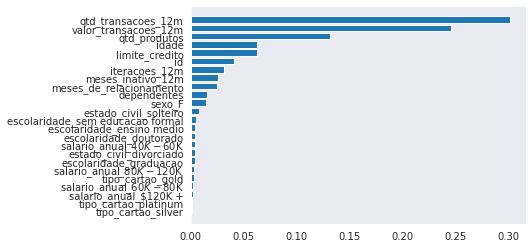

In [57]:
modelo = RandomForestRegressor()

modelo.fit(x_train, y_train)

importances = modelo.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])


O tamanho das barras no diagrama acima é proporcional à significância da variável para o modelo. Assim, podemos corroborar o resultado da análise feita anteriormente através do gráfico de dispersão, de fato, a quantidade de transações e o valor destas transações são determinantes para prevermos se um cliente se tornará inadimplente. Podemos então nos assegurar de acionar.